In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import networkx as nx
%matplotlib inline
from ast import literal_eval
import math

In [8]:
raw_df=pd.read_csv('/content/drive/MyDrive/Graph Analysis/Tweets_Processed.csv')
raw_df['hastags']= (raw_df['hastags'])
raw_df

,tweet_id,author_id,tweet_by,tweet_by_verified,user_location,text,clean_tweet,adjectives,sentiment_text,created_at,source,retweets,replies,likes,quote_count,hastags,mentions,subjectivity,polarity,sentiment
0,1504608485106888711,1403157601211359235,FirdoseM,True,NaN,What will happen to #IPL once #MSDhoni #ViratK...,happen,NaN,happen,2022-03-17 23:59:51+00:00,Twitter for iPhone,0,0,0,0,"['IPL', 'MSDhoni', 'ViratKohli', 'RohithSharma...",[],0.000000,0.000000,Neutral
1,1504608441117167621,973385868202389504,mufaddal_vohra,False,NaN,IPL 2022: Rajasthan Royals Unveil New Jersey I...,unveil new jersey fun video red bull watch,unveil new red,unveil new jersey fun video red bull watch,2022-03-17 23:59:41+00:00,WordPress.com,0,0,0,0,[],[],0.218182,0.145455,Positive
2,1504608013780680705,1406809370738925573,Sundarwashi5,True,"Chennai, India","""The main lesson to learn is that South Africa...",main lesson learn south likely always choose s...,main likely south brilliant,main lesson learn south likely always choose s...,2022-03-17 23:57:59+00:00,Twitter Web App,0,1,2,0,[],['FirdoseM'],0.777778,0.355556,Positive
3,1504606386709274625,1482099420250312705,bhogleharsha,True,"Mumbai, India",Thinking about selling your home? Get your sel...,thinking selling home get seller guide today l...,NaN,thinking selling home get seller guide today l...,2022-03-17 23:51:31+00:00,Back At You,0,0,0,0,[],[],0.000000,0.000000,Neutral
4,1504606037508300801,26676235,DesignerAsh87,False,"Manchester, England",Thinking about selling your home? Get your sel...,thinking selling home get seller guide today l...,NaN,thinking selling home get seller guide today l...,2022-03-17 23:50:08+00:00,Back At You,0,0,0,0,"['AtHomeInCarlsbad', 'CarlsbadRealtor']",[],0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1504552095931932679,35739920,imabd28,True,"Sialkot, Pakistan",Thinking about selling your home? Get your sel...,thinking selling home get seller guide today l...,NaN,thinking selling home get seller guide today l...,2022-03-17 20:15:47+00:00,Back At You,0,0,0,0,[],[],0.900000,0.700000,Positive
189,1504551950099968000,880031916019171328,iMRizwanPak,True,Pakistan,@rilla_2004 If @KKRiders will go with this it ...,go best jersey ever great work,great,go best jersey ever great work,2022-03-17 20:15:12+00:00,Twitter for Android,0,1,3,0,[],"['rilla_2004', 'KKRiders']",0.525000,0.900000,Positive
190,1504551880126795776,3099473820,TheRealPCB,True,NaN,Okay paring the p*rn comment let’s bring some ...,paring comment let bring classy classy family ...,classy classy lifetime ban scam scam real classy,paring comment let bring classy classy family ...,2022-03-17 20:14:56+00:00,Twitter for iPhone,0,1,0,1,[],[],0.733333,0.183333,Positive
191,1504551825176940544,1470724238466236422,FirdoseM,True,NaN,IPL Franchise Delhi Capitals team bus has been...,franchise team bus attached group people attack,NaN,franchise team bus attached group people attack,2022-03-17 20:14:43+00:00,Twitter for iPhone,2,3,3,1,"['IPL', 'DelhiCapitals', 'Attack']",[],0.000000,0.000000,Neutral


In [9]:
def getMentionList():   
    p = raw_df.mentions 
    mentions=set()
    for i,mention in p.items():
        for m in literal_eval(mention):
            mentions.add((m.lower(),1,raw_df.iloc[i].sentiment,i))
    return mentions

In [10]:
def getHashTagList():    
    hash_tags=set()
    p = raw_df.hastags
    # for index, row in df.iterrows():
    for i,tags in p.items():
        for s in literal_eval(tags):
            hash_tags.add((s.lower(),2,raw_df.iloc[i].sentiment,i))
    return hash_tags

In [11]:
def getAuthorList():  
    p = raw_df.tweet_by  
    authors=set()
    for i,auth in p.items():
            authors.add((auth.lower(),3,raw_df.iloc[i].sentiment,i))
    return authors

In [12]:
def getTweetList():
    p = raw_df.tweet_id      
    tweets=set()
    for i,tweet in p.items():
            tweets.add((tweet,4,raw_df.iloc[i].sentiment,i))
    return tweets

In [13]:
hashtag_list=getHashTagList()
mention_list=getMentionList()
author_list=getAuthorList()
tweet_list=getTweetList()

In [14]:
print(len(mention_list))

190


In [15]:
nodes=set()

In [16]:
nodes.clear()
nodes.update(hashtag_list)
nodes.update(mention_list)
nodes.update(author_list)
nodes.update(tweet_list)

In [17]:
len(nodes)

677

In [18]:
# creating the dataframe
column_values = ['Label','NodeType','Sentiment','ParentNode']
node_df = pd.DataFrame(data = nodes, columns = column_values)
node_df.insert(0, 'ID', range(1, 1 + len(node_df)))
node_df['ID']=node_df.index+1

In [19]:
node_df

,ID,Label,NodeType,Sentiment,ParentNode
0,1,1504593691209461760,4,Neutral,23
1,2,1504586794779967490,4,Positive,44
2,3,firdosem,1,Positive,2
3,4,criccrazyj0hns,3,Neutral,38
4,5,maliksa11065709,3,Neutral,87
...,...,...,...,...,...
672,673,cricketcomau,3,Positive,31
673,674,tataipl2022,2,Negative,151
674,675,bhogleharsha,1,Positive,133
675,676,cricbuzz,3,Positive,64


In [20]:
# saving the nodelist dataframe
node_df.to_csv('tweet_node_list.csv',index=False)

In [21]:
def getNodeID(label, nodetype):
    return node_df.loc[(node_df['Label'] == label) & (node_df['NodeType'] == nodetype) , 'ID'].values[0]

In [22]:

#getNodeID('yellovearmy',2)


# Create Edge List

In [23]:
edgecolors=['#ff0000','#00ff00','#0000ff']
def getSentimentColor(sentiment):
    if sentiment=='Negative':
        return edgecolors[0]
    elif sentiment=='Positive':
        return edgecolors[1]
    elif sentiment=='Neutral':
        return edgecolors[2]

In [24]:
edges=[]
for row in raw_df.itertuples(index=True, name='Pandas'):
    tail=getNodeID(row.tweet_by.lower(),3)
    head=getNodeID(row.tweet_id,4) 
    edges.append([tail,head,'Posts',getSentimentColor(node_df.iloc[tail-1].Sentiment)])         

In [25]:
for row in raw_df.itertuples(index=True, name='Pandas'):
    tail=getNodeID(row.tweet_id,4)
    for s in literal_eval(row.hastags):
        head=getNodeID(s.lower(),2)
        edges.append([tail,head,'Tags',getSentimentColor(node_df.iloc[tail-1].Sentiment)])       

In [26]:
for row in raw_df.itertuples(index=True, name='Pandas'):
    tail=getNodeID(row.tweet_id,4)
    for s in literal_eval(row.mentions):
        head=getNodeID(s.lower(),1)
        edges.append([tail,head,'Mentions',getSentimentColor(node_df.iloc[tail-1].Sentiment)])   

In [27]:
len(edges)

490

In [28]:
# creating a list of column names
column_values = ['Source', 'Target', 'Relation','Sentiment_Color']  
# creating the dataframe
edge_df = pd.DataFrame(data = edges, columns = column_values)
edge_df.set_index(['Source','Target']).stack().drop_duplicates().unstack().reset_index()
edge_df.to_csv("tweet_edge_list.csv", index=False)

In [29]:
edge_df

,Source,Target,Relation,Sentiment_Color
0,458,325,Posts,#0000ff
1,23,444,Posts,#0000ff
2,460,85,Posts,#00ff00
3,37,72,Posts,#0000ff
4,186,643,Posts,#0000ff
...,...,...,...,...
485,273,61,Mentions,#00ff00
486,273,123,Mentions,#00ff00
487,273,208,Mentions,#00ff00
488,650,253,Mentions,#00ff00


In [30]:
shapes=list('so^d>v<dph8')
node_shape=shapes[0:4]
def getShape(nodetype):
    if nodetype==1:
        return shapes[0]
    elif nodetype==2:
        return shapes[1]
    elif nodetype==3:
        return shapes[2]
    elif nodetype==4:
        return shapes[3]

In [31]:
def getNodeType(id):
    nodetype=node_df.loc[id].NodeType
    if nodetype==1:
        return "Mention"
    elif nodetype==2:
        return "Hash Tag"
    elif nodetype==3:
        return "Author"
    elif nodetype==4:
        return "Tweet"

In [32]:
from itertools import count

In [33]:
colors=['#0b3954','#087e8b','#04e762','#f5b700']
def getColor(nodetype):
    if nodetype==1:
        return colors[0]
    elif nodetype==2:
        return colors[1]
    elif nodetype==3:
        return colors[2]
    elif nodetype==4:
        return colors[3]

In [34]:
g = nx.from_pandas_edgelist(edge_df, 'Source', 'Target', ['Relation','Sentiment_Color'], create_using=nx.DiGraph())

In [35]:
labels=node_df.Label.values
nodetypes=node_df.NodeType.values
for i,node in enumerate(sorted(g.nodes())):
    g.nodes[node]['Label'] = labels[i]
    g.nodes[node]['NodeType'] = int(nodetypes[i])
    g.nodes[node]['shape'] = getShape(int(nodetypes[i]))
    g.nodes[node]['color'] = getColor(int(nodetypes[i]))
    g.nodes[node]['size'] = (g.degree(node)+1)*100

In [36]:
g.is_directed()

True

In [37]:
nx.info(g)

'DiGraph with 546 nodes and 484 edges'

4


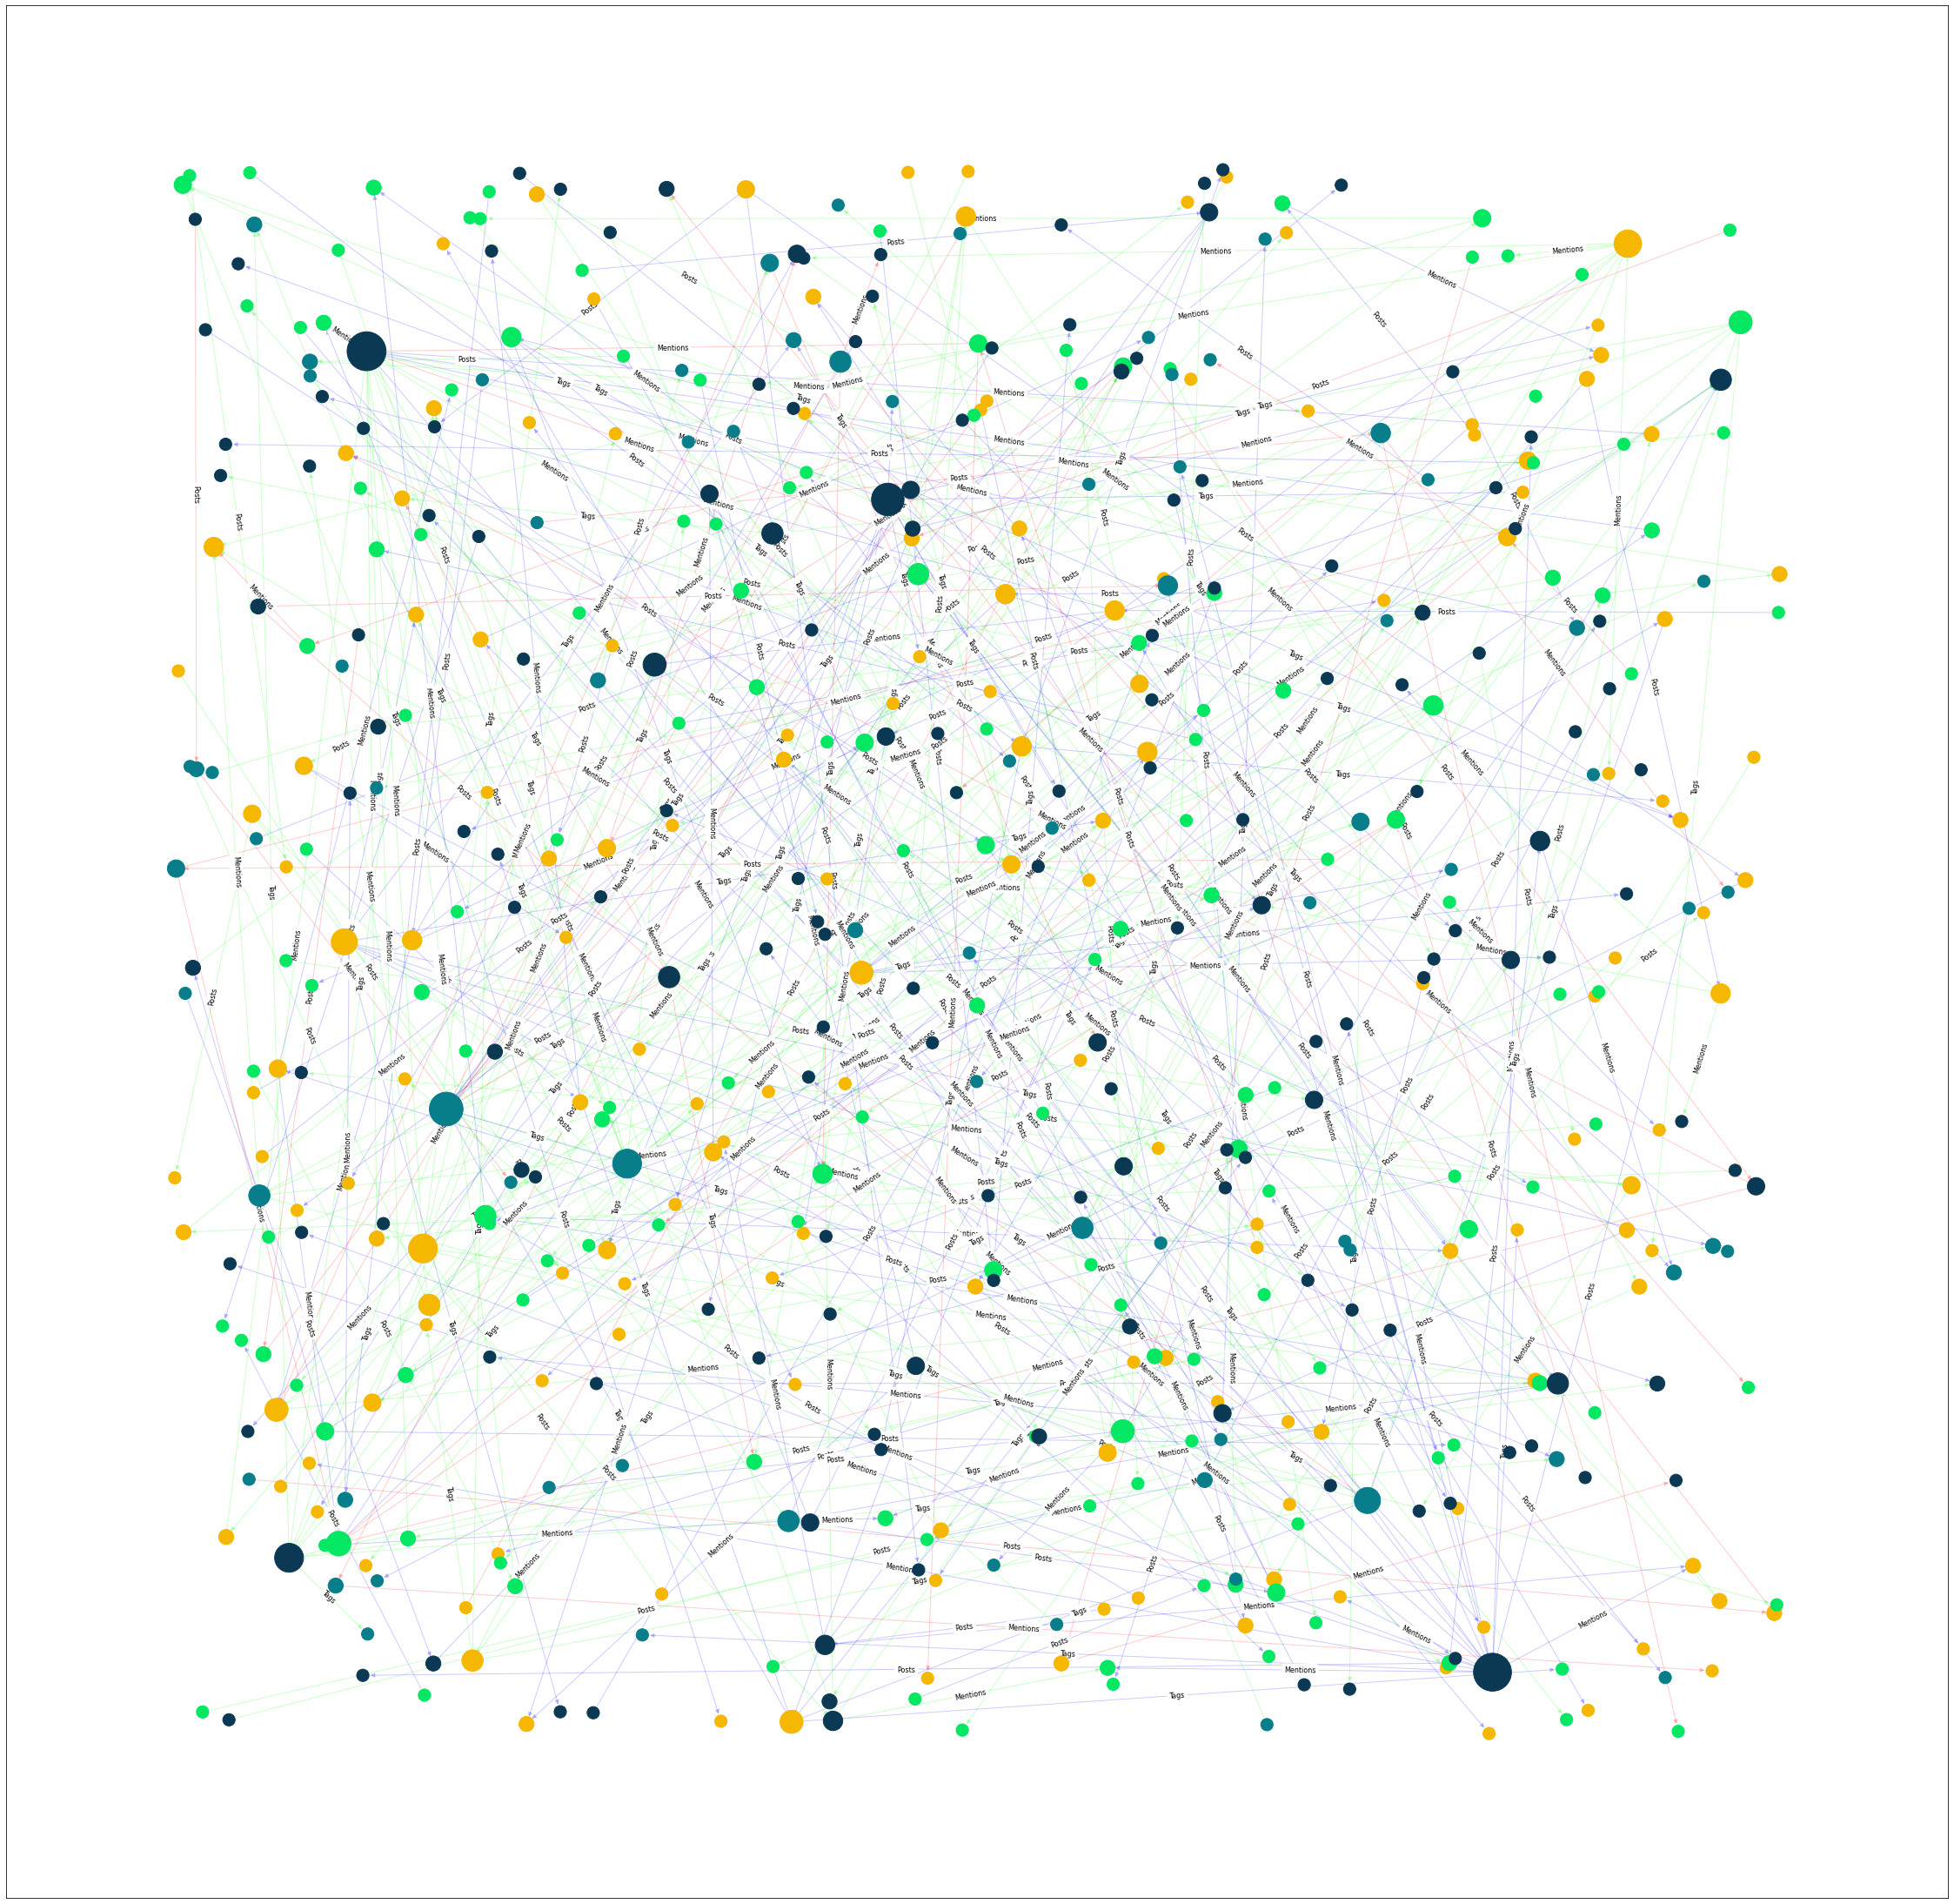

In [ ]:
pos = nx.random_layout(g)
d = dict(g.degree)
node_size=[v * 100 for v in d.values()]
print(len(node_shape))
plt.figure(3,figsize=(40,40)) 
for shape in set(node_shape):
    # the nodes with the desired shapes
    node_list = [node for node in g.nodes() if g.nodes[node]['shape'] == shape]
    nx.draw_networkx_nodes(g,pos,nodelist=node_list,
                           node_size = [g.nodes[node]['size'] for node in node_list],
                           #node_shape = shape,
                           node_color= [g.nodes[node]['color'] for node in node_list]
                          )
edge_labels = nx.get_edge_attributes(g, 'Relation')
colors = [g[u][v]['Sentiment_Color'] for u,v in g.edges]
nx.draw_networkx_edge_labels(g, pos, edge_labels, font_size=8)
edg=nx.draw_networkx_edges(g,pos,edge_color=colors,alpha=0.2 ) # draw edgesb

**The following image is a visualization of the network in Gephi**

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Graph Analysis/sample gephi graph.jpg') 

FileNotFoundError: ignored

In [ ]:
def getTopCategories(temp_list):
  temp_df=pd.DataFrame(sorted(temp_list, key=temp_list.get, reverse=True), columns=["ID"])
  #print(node_df.iloc[w-1].Label,getNodeType(node_df.iloc[w-1].NodeType),most_influential[w] )
  temp_df['Label']= temp_df.apply (lambda row: node_df.iloc[int(row['ID'])-1].Label, axis=1)
  temp_df['NodeType']= temp_df.apply (lambda row: getNodeType(int(row['ID'])-1), axis=1)
  temp_df['score']= temp_df.apply (lambda row: temp_list[row['ID']], axis=1)
  temp_df = temp_df[(temp_df[['score']] != 0).any(axis=1)]
  idx=temp_df.groupby(['NodeType'])['score'].transform(max)==temp_df['score']
  print(temp_df[idx])

In [ ]:
#Most Influential
#nx.degree_centrality
most_influential = nx.degree_centrality(g)
x=getTopCategories(most_influential)


In [ ]:
### Most Important Connection
#nx.eigenvector_centrality
most_important_link = nx.eigenvector_centrality(g,max_iter=200)
getTopCategories(most_important_link)

In [ ]:
### Betweener Centrality
#Bridge/Connect
best_connector = nx.betweenness_centrality(g)
getTopCategories(best_connector)

In [ ]:
# import numpy as np
# L = nx.adjacency_matrix(g)
# e = np.linalg.eigvals(L.A).max()+0.001 # some tweaing to avoid divide by 0 // katz cenrtality is not posible if max eigen value is 0 as i this case
# alpha=(1/e)-0.00001
# beta=0.0001
# centrality = nx.katz_centrality(g, alpha)
# for n, c in sorted(centrality.items()):
#     print(f"{n} {c:.2f}")